### import library and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

quiet_data = pd.read_csv('quietcafe_data.csv')
seoul_quiet_data = pd.read_csv('seoulquietcafe_data.csv')
bookcafe_data = pd.read_csv('bookcafe_data.csv')

### 3개의 데이터를 합친 total_data, bookcafe_data를 사용해서 데이터 분석 진행
- bookcafe의 경우 책을 읽거나 공부하기 위한 목적으로 더 많이 갈 것으로 추정해서 여기 키워드 리뷰 중심 분석을 진행하고
- 조용한카페 키워드와 bookcafe의 데이터에서 등장하는 키워드들을 합쳐서 분석했을 때는 어떤 차이가 있는지, 공통점이 있는지를 분석해봄

### 1. total_data Data 가공

In [2]:
total_data = pd.concat([quiet_data, seoul_quiet_data, bookcafe_data], axis=0)
total_data.index = np.arange(0, len(total_data), 1) # 인덱스 리셋

In [3]:
total_data

,place,tag_title,tag_count
0,컵 오브 컴포트,"['친절해요', '매장이 청결해요', '집중하기 좋아요', '커피가 맛있어요', '...","[8, 6, 6, 5, 3]"
1,피터패트,"['커피가 맛있어요', '디저트가 맛있어요', '친절해요', '인테리어가 멋져요',...","[164, 136, 83, 76, 70]"
2,도로도로커피숍,"['커피가 맛있어요', '디저트가 맛있어요', '음료가 맛있어요', '인테리어가 멋...","[80, 62, 49, 44, 42]"
3,LITITCOFFEE,"['커피가 맛있어요', '친절해요', '매장이 청결해요', '집중하기 좋아요', '...","[23, 15, 15, 14, 11]"
4,달콤쌉싸롱,"['커피가 맛있어요', '가성비가 좋아요', '집중하기 좋아요', '친절해요', '...","[52, 36, 31, 28, 27]"
...,...,...,...
745,커피랑도서관 정자카페거리점,[],[]
746,언더스탠드,[],[]
747,청년이음 북카페 & 공방,"['커피가 맛있어요', '가성비가 좋아요', '음료가 맛있어요', '친절해요', '...","[17, 13, 12, 11, 3]"
748,커피랑도서관 올림픽공원점,[],[]


- tag_count의 경우 리뷰가 많은 경우와 적은 경우의 차이가 크므로 이 count 수로 통계를 내면 리뷰가 많은 카페 데이터 중심의 결과가 나타날 것 같아서 빈도 수를 통해서 통계를 냈음

In [4]:
for i in range(len(total_data)):
    if len(total_data['tag_title'][i]) == 2:
        total_data['tag_title'][i] = np.nan
    
    if len(total_data['tag_count'][i]) == 2:
        total_data['tag_count'][i] = np.nan
        
total_data.isna().sum() # total_data 결측치

place          0
tag_title    197
tag_count    195
dtype: int64

In [5]:
#tag_title, tag_count 전부 nan 인것은 드랍하기
total_data = total_data.dropna(subset=['tag_count'])
print(total_data.isna().sum())

total_data['tag_title'][total_data['tag_title'].isnull()]

place        0
tag_title    2
tag_count    0
dtype: int64


717    NaN
724    NaN
Name: tag_title, dtype: object

In [6]:
print(total_data.loc[717])
print(total_data.loc[724])

place                       달빛정거장
tag_title                     NaN
tag_count    [19, 17, 16, 15, 10]
Name: 717, dtype: object
place             즐거운다락방부천시청점
tag_title                 NaN
tag_count    [11, 3, 3, 3, 2]
Name: 724, dtype: object


In [7]:
# 직접 사이트에서 다음 장소에 대한 키워드를 찾아서 추가
# 달빛 정거장 ==> ['친절해요', '읽을만한 책이 많아요', '좌석이 편해요', '집중하기 좋아요', '인테리어가 멋져요']
# 즐거운다락방부천시청점 ==> ['읽을만한 책이 많아요', '음료가 맛있어요', '친절해요', '가성비가 좋아요', '커피가 맛있어요']

total_data.loc[717, 'tag_title'] = ['친절해요', '읽을만한 책이 많아요', '좌석이 편해요', '집중하기 좋아요', '인테리어가 멋져요']
total_data.loc[724, 'tag_title'] = ['읽을만한 책이 많아요', '음료가 맛있어요', '친절해요', '가성비가 좋아요', '커피가 맛있어요']
total_data.isna().sum()

total_data.index = np.arange(0, len(total_data), 1) # 인덱스 리셋
total_data

/Users/byeorikim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/byeorikim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,place,tag_title,tag_count
0,컵 오브 컴포트,"['친절해요', '매장이 청결해요', '집중하기 좋아요', '커피가 맛있어요', '...","[8, 6, 6, 5, 3]"
1,피터패트,"['커피가 맛있어요', '디저트가 맛있어요', '친절해요', '인테리어가 멋져요',...","[164, 136, 83, 76, 70]"
2,도로도로커피숍,"['커피가 맛있어요', '디저트가 맛있어요', '음료가 맛있어요', '인테리어가 멋...","[80, 62, 49, 44, 42]"
3,LITITCOFFEE,"['커피가 맛있어요', '친절해요', '매장이 청결해요', '집중하기 좋아요', '...","[23, 15, 15, 14, 11]"
4,달콤쌉싸롱,"['커피가 맛있어요', '가성비가 좋아요', '집중하기 좋아요', '친절해요', '...","[52, 36, 31, 28, 27]"
...,...,...,...
550,만화카페통툰 안암점,"['친절해요', '읽을만한 책이 많아요', '가성비가 좋아요', '좌석이 편해요',...","[6, 3, 3, 2, 2]"
551,카페오아시아,"['커피가 맛있어요', '친절해요', '가성비가 좋아요', '대화하기 좋아요', '...","[13, 6, 4, 4, 2]"
552,동네책방,"['커피가 맛있어요', '친절해요', '대화하기 좋아요', '음료가 맛있어요', '...","[21, 20, 12, 11, 7]"
553,책으로가는문,"['인테리어가 멋져요', '읽을만한 책이 많아요', '집중하기 좋아요', '좌석이 ...","[69, 57, 42, 35, 22]"


In [8]:
# string에서 str 리스트로 바꾸기, data 처리

for i in range(len(total_data)):
    tmp_title = str(total_data.tag_title[i]).split(',')
    tmp_count = str(total_data.tag_count[i]).split(',')
    tmp_title[0] = tmp_title[0].replace('[', '').replace("'", '').replace("'", '')
    tmp_title[1] = tmp_title[1].replace(' ', '').replace("'", '').replace("'", '')
    tmp_title[2] = tmp_title[2].replace(' ', '').replace("'", '').replace("'", '')
    tmp_title[3] = tmp_title[3].replace(' ', '').replace("'", '').replace("'", '')
    tmp_title[4] = tmp_title[4].replace(' ', '').replace("'", '').replace("'", '').replace(']', '')
    
    tmp_count[0] = tmp_count[0].replace("[", '').replace("'", '')
    tmp_count[1] = tmp_count[1].replace("'", '').replace("'", '')
    tmp_count[2] = tmp_count[2].replace("'", '').replace("'", '')
    tmp_count[3] = tmp_count[3].replace("'", '').replace("'", '')
    tmp_count[4] = tmp_count[4].replace("'", '').replace("]", '')
    
    
    # str -> int로
    for j in range(len(tmp_count)):
        tmp_count[j] = int(tmp_count[j])
        
    total_data['tag_title'][i] = tmp_title
    total_data['tag_count'][i] = tmp_count
    
# dictionary 생성하기 

keyword_dict = {} # key는 keyword, value는 등장 횟수

for i in range(len(total_data)):
    for j in range(5):
        find_key = total_data['tag_title'][i][j]
        idx = find_key.find(' ')
        while idx > -1:
            find_key = find_key.replace(' ', '')
            idx = find_key.find(' ')
    
        if find_key in keyword_dict:
            keyword_dict[find_key] += 1
        
        else:
            keyword_dict[find_key] = 1
            
keyword_dict

/Users/byeorikim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/byeorikim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


{'친절해요': 412,
 '매장이청결해요': 164,
 '집중하기좋아요': 78,
 '커피가맛있어요': 518,
 '좌석이편해요': 31,
 '디저트가맛있어요': 331,
 '인테리어가멋져요': 298,
 '음료가맛있어요': 430,
 '가성비가좋아요': 74,
 '대화하기좋아요': 130,
 '특별한메뉴가있어요': 150,
 '사진이잘나와요': 30,
 '빵이맛있어요': 39,
 '주차하기편해요': 8,
 '뷰가좋아요': 30,
 '읽을만한책이많아요': 38,
 '선물하기좋아요': 3,
 '차가맛있어요': 6,
 '음식이맛있어요': 2,
 '매장이넓어요': 1,
 '화장실이깨끗해요': 2}

### 2. bookcafe Data 가공
- 주로 공부, 독서를 하러 가는 북카페에 대한 리뷰만 분석해보기

In [9]:
for i in range(len(bookcafe_data)):
    if len(bookcafe_data['tag_title'][i]) == 2:
        bookcafe_data['tag_title'][i] = np.nan
    
    if len(bookcafe_data['tag_count'][i]) == 2:
        bookcafe_data['tag_count'][i] = np.nan
        
bookcafe_data.isna().sum() # bookcafe_data 결측치

place          0
tag_title    161
tag_count    159
dtype: int64

In [10]:
#tag_title, tag_count 전부 nan 인것은 드랍하기
bookcafe_data = bookcafe_data.dropna(subset=['tag_count'])
print(bookcafe_data.isna().sum())

bookcafe_data['tag_title'][bookcafe_data['tag_title'].isnull()]

place        0
tag_title    2
tag_count    0
dtype: int64


217    NaN
224    NaN
Name: tag_title, dtype: object

In [11]:
print(bookcafe_data.loc[217])
print(bookcafe_data.loc[224])

place                       달빛정거장
tag_title                     NaN
tag_count    [19, 17, 16, 15, 10]
Name: 217, dtype: object
place             즐거운다락방부천시청점
tag_title                 NaN
tag_count    [11, 3, 3, 3, 2]
Name: 224, dtype: object


In [12]:
# 직접 사이트에서 다음 장소에 대한 키워드를 찾아서 추가
# 달빛 정거장 ==> ['친절해요', '읽을만한 책이 많아요', '좌석이 편해요', '집중하기 좋아요', '인테리어가 멋져요']
# 즐거운다락방부천시청점 ==> ['읽을만한 책이 많아요', '음료가 맛있어요', '친절해요', '가성비가 좋아요', '커피가 맛있어요']

bookcafe_data.loc[217, 'tag_title'] = ['친절해요', '읽을만한 책이 많아요', '좌석이 편해요', '집중하기 좋아요', '인테리어가 멋져요']
bookcafe_data.loc[224, 'tag_title'] = ['읽을만한 책이 많아요', '음료가 맛있어요', '친절해요', '가성비가 좋아요', '커피가 맛있어요']
bookcafe_data.isna().sum()

bookcafe_data.index = np.arange(0, len(bookcafe_data), 1) # 인덱스 리셋
bookcafe_data

,place,tag_title,tag_count
0,지오북카페,"['커피가 맛있어요', '집중하기 좋아요', '읽을만한 책이 많아요', '좌석이 편...","[7, 7, 4, 4, 4]"
1,청맥살롱,"['친절해요', '커피가 맛있어요', '집중하기 좋아요', '대화하기 좋아요', '...","[12, 10, 10, 10, 7]"
2,자상한시간,"['커피가 맛있어요', '친절해요', '음료가 맛있어요', '집중하기 좋아요', '...","[11, 6, 3, 3, 3]"
3,채그로,"['뷰가 좋아요', '커피가 맛있어요', '인테리어가 멋져요', '읽을만한 책이 많...","[26, 17, 13, 12, 11]"
4,서울북카페 욕망의북카페,"['집중하기 좋아요', '읽을만한 책이 많아요', '좌석이 편해요', '친절해요',...","[282, 179, 173, 162, 132]"
...,...,...,...
86,만화카페통툰 안암점,"['친절해요', '읽을만한 책이 많아요', '가성비가 좋아요', '좌석이 편해요',...","[6, 3, 3, 2, 2]"
87,카페오아시아,"['커피가 맛있어요', '친절해요', '가성비가 좋아요', '대화하기 좋아요', '...","[13, 6, 4, 4, 2]"
88,동네책방,"['커피가 맛있어요', '친절해요', '대화하기 좋아요', '음료가 맛있어요', '...","[21, 20, 12, 11, 7]"
89,책으로가는문,"['인테리어가 멋져요', '읽을만한 책이 많아요', '집중하기 좋아요', '좌석이 ...","[69, 57, 42, 35, 22]"


In [13]:
# string에서 str 리스트로 바꾸기, data 처리
# '커피가 맛있어요', '커피가맛있어요' 이런 식으로 띄어쓰기에 의해 keyword가 분리되는 것을 구분하고
# [] 와 같은 리스트 표시, 띄어쓰기로 인해 다르게 분류 되는 것 등등을 예방하기 위한 처리를 진행

for i in range(len(bookcafe_data)):
    tmp_title = str(bookcafe_data.tag_title[i]).split(',')
    tmp_count = str(bookcafe_data.tag_count[i]).split(',')
    tmp_title[0] = tmp_title[0].replace('[', '').replace("'", '').replace("'", '')
    tmp_title[1] = tmp_title[1].replace(' ', '').replace("'", '').replace("'", '')
    tmp_title[2] = tmp_title[2].replace(' ', '').replace("'", '').replace("'", '')
    tmp_title[3] = tmp_title[3].replace(' ', '').replace("'", '').replace("'", '')
    tmp_title[4] = tmp_title[4].replace(' ', '').replace("'", '').replace("'", '').replace(']', '')
    
    tmp_count[0] = tmp_count[0].replace("[", '').replace("'", '')
    tmp_count[1] = tmp_count[1].replace("'", '').replace("'", '')
    tmp_count[2] = tmp_count[2].replace("'", '').replace("'", '')
    tmp_count[3] = tmp_count[3].replace("'", '').replace("'", '')
    tmp_count[4] = tmp_count[4].replace("'", '').replace("]", '')
    
    
    # str -> int로(count로 덧셈을 해서 정리해야 하므로)
    for j in range(len(tmp_count)):
        tmp_count[j] = int(tmp_count[j])
        
    bookcafe_data['tag_title'][i] = tmp_title
    bookcafe_data['tag_count'][i] = tmp_count
    
# dictionary 생성하기 

bc_keyword_dict = {} # key는 keyword, value는 등장 횟수

for i in range(len(bookcafe_data)):
    for j in range(5):
        find_key = bookcafe_data['tag_title'][i][j]
        idx = find_key.find(' ')
        while idx > -1:
            find_key = find_key.replace(' ', '')
            idx = find_key.find(' ')
    
        if find_key in bc_keyword_dict:
            bc_keyword_dict[find_key] += 1
        
        else:
            bc_keyword_dict[find_key] = 1
            
bc_keyword_dict

{'커피가맛있어요': 83,
 '집중하기좋아요': 37,
 '읽을만한책이많아요': 33,
 '좌석이편해요': 18,
 '음료가맛있어요': 64,
 '친절해요': 70,
 '대화하기좋아요': 30,
 '뷰가좋아요': 7,
 '인테리어가멋져요': 34,
 '화장실이깨끗해요': 2,
 '디저트가맛있어요': 19,
 '특별한메뉴가있어요': 9,
 '가성비가좋아요': 32,
 '주차하기편해요': 4,
 '빵이맛있어요': 2,
 '사진이잘나와요': 6,
 '매장이청결해요': 5}

### 3. plot data

In [14]:
# total data plot하기 위한 데이터프레임
plot_total = pd.DataFrame({'keyword' : keyword_dict.keys(),
                         'count' : keyword_dict.values()})

plot_total = plot_total.set_index('keyword')

# bookcafe data plot하기 위한 데이터프레임
plot_bookcafe = pd.DataFrame({'keyword' : bc_keyword_dict.keys(),
                         'count' : bc_keyword_dict.values()})

plot_bookcafe = plot_bookcafe.set_index('keyword')

<AxesSubplot:xlabel='keyword'>

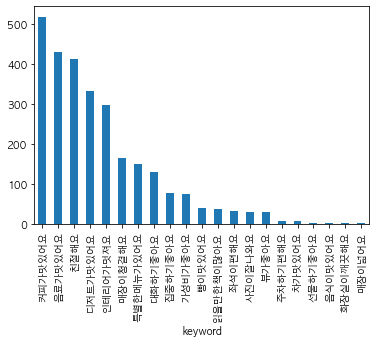

In [15]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False # 글씨 깨지는 것 방지

plot_total = plot_total['count'].sort_values(ascending=False)
plot_total.plot(kind='bar')

<AxesSubplot:xlabel='keyword'>

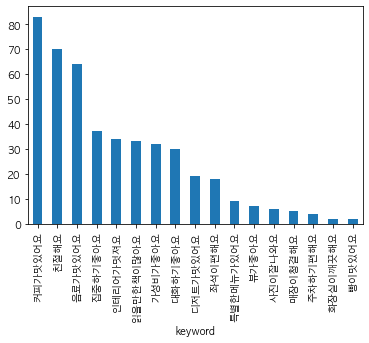

In [16]:
plot_bookcafe = plot_bookcafe['count'].sort_values(ascending=False)
plot_bookcafe.plot(kind='bar')

- 기본적으로 '커피가 맛있다', '친절하다', '음료가 맛있다'가 공동 1-3위를 차지한다.

- 메뉴와 관련된 키워드를 제외하고 분석하면
- 북카페의 경우 그 다음으로는 '집중하기 좋다', '인테리어', '가성비', '대화하기 좋은', '좌석 편함'이 주로 비중을 차지하며
- 전체 조용한 카페와 북카페 데이터를 통합하였을 때 결과는 '인테리어', '청결', '대화하기 좋은', '집중하기 좋은', '가성비' 등이 주로 비중을 차지함.